## Loading modules

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

## Loading Dataset


In [0]:
data = np.lib.DataSource()
fp = data.open('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

x = np.genfromtxt(BytesIO(fp.read().encode()), delimiter=',', usecols=range(2), max_rows=100)
y = np.zeros(100)
y[50:] = 1

In [4]:
np.random.seed(1)
index = np.arange(y.shape[0])
np.random.shuffle(index)
x_test, y_test = x[index[:25]], y[index[:25]]
x_train, y_train = x[index[25:]], y[index[25:]]
mu, std = np.mean(x_train, axis=0), np.std(x_train, axis=0)
x_train, x_test = (x_train - mu)/std, (x_test - mu)/std
print("X and Y: " , x.shape, " ", y.shape)
print("X_train and Y_train: " , x_train.shape, " ", y_train.shape)
print("X_test and Y_test: " , x_test.shape, " ", y_test.shape)

X and Y:  (100, 2)   (100,)
X_train and Y_train:  (75, 2)   (75,)
X_test and Y_test:  (25, 2)   (25,)


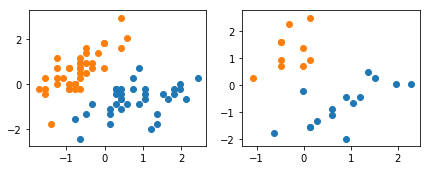

In [5]:
fig, ax = plt.subplots(1,2, figsize=(7,2.5))
ax[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1])
ax[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1])
ax[1].scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1])
ax[1].scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1])
plt.show()

## Helper Function

In [0]:
def iter_minibatches(arrays, batch_size, shuffle=False, seed = None):
  rgen = np.random.RandomState(seed)
  indices = np.arange(arrays[0].shape[0])
  
  if shuffle:
    rgen.shuffle(indices)
  for start_idx in range(0, indices.shape[0] - batch_size+1, batch_size):
    index_slice = indices[start_idx : start_idx + batch_size]
    yield(ary[index_slice] for ary in arrays)

## Model Construction


In [0]:
import tensorflow as tf

### Hyperparameters

In [0]:
n_features = x.shape[1]
n_samples = x.shape[0]
learning_rate = 0.05
training_epochs = 20
batch_size = 5

### Defining graph

In [0]:
g= tf.Graph()
with g.as_default() as g:
  tf_x = tf.placeholder(dtype=tf.float32, shape = [None, n_features], name='inputs')
  tf_y = tf.placeholder(dtype=tf.float32, shape = [None], name='targets')
  
  params = { 'weights': tf.Variable(tf.zeros(shape=[n_features, 1], dtype= tf.float32), name = 'weights'), 
             'bias': tf.Variable([[0.]],dtype=tf.float32, name='bias')}
  
  linear = tf.matmul(tf_x, params['weights'] + params['bias'])
  pred_proba = tf.sigmoid(linear, name='predict_probas')
  
  r = tf.reshape(pred_proba, [-1])
  cost = tf.reduce_mean(tf.reduce_sum((-tf_y * tf.log(r)) - ((1. - tf_y)* tf.log(1. - r))), name = 'cost')
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
  train = optimizer.minimize(cost, name = "train")
  
  pred_labels = tf.round(tf.reshape(pred_proba, [-1]), name = "predict_labels")
  correct_prediction = tf.equal(tf_y, pred_labels)
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = 'accuracy')

### Running Sessions

In [20]:
with tf.Session(graph=g) as sess:
  sess.run(tf.global_variables_initializer())
  
  avg_cost = np.nan
  count = 1
  
  for epoch in range(training_epochs):
    train_acc = sess.run("accuracy:0", feed_dict={tf_x: x_train, tf_y: y_train})
    valid_acc = sess.run("accuracy:0", feed_dict={tf_x: x_test, tf_y: y_test})
    print("Epoch: %03d | AvgCost: %.3f" % (epoch, avg_cost / count), end="")
    print(" | Train/Valid ACC: %.2f/%02f" % (train_acc, valid_acc))
    
    avg_cost = 0
    for x_batch, y_batch in iter_minibatches(arrays = [x_train, y_train], batch_size = batch_size, shuffle=True, seed = 42):
      feed_dict = {'inputs:0': x_batch, 'targets:0': y_batch}
      _, c = sess.run(['train', 'cost:0'], feed_dict=feed_dict)
      avg_cost+=c
      count+=1
      
  weights, bias = sess.run(['weights:0', 'bias:0'])
  print("\nWeights:\n", weights)
  print("\nBias:\n", bias)

Epoch: 000 | AvgCost: nan | Train/Valid ACC: 0.53/0.400000
Epoch: 001 | AvgCost: 2.130 | Train/Valid ACC: 1.00/1.000000
Epoch: 002 | AvgCost: 0.589 | Train/Valid ACC: 1.00/1.000000
Epoch: 003 | AvgCost: 0.287 | Train/Valid ACC: 1.00/1.000000
Epoch: 004 | AvgCost: 0.174 | Train/Valid ACC: 1.00/1.000000
Epoch: 005 | AvgCost: 0.119 | Train/Valid ACC: 1.00/1.000000
Epoch: 006 | AvgCost: 0.088 | Train/Valid ACC: 1.00/1.000000
Epoch: 007 | AvgCost: 0.068 | Train/Valid ACC: 1.00/1.000000
Epoch: 008 | AvgCost: 0.054 | Train/Valid ACC: 1.00/1.000000
Epoch: 009 | AvgCost: 0.044 | Train/Valid ACC: 1.00/1.000000
Epoch: 010 | AvgCost: 0.037 | Train/Valid ACC: 1.00/1.000000
Epoch: 011 | AvgCost: 0.032 | Train/Valid ACC: 1.00/1.000000
Epoch: 012 | AvgCost: 0.028 | Train/Valid ACC: 1.00/1.000000
Epoch: 013 | AvgCost: 0.024 | Train/Valid ACC: 1.00/1.000000
Epoch: 014 | AvgCost: 0.021 | Train/Valid ACC: 1.00/1.000000
Epoch: 015 | AvgCost: 0.019 | Train/Valid ACC: 1.00/1.000000
Epoch: 016 | AvgCost: 0.01